In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stat

from tkinter import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.metrics import r2_score

#pd.options.mode.chained_assignment = "raise" # raises exception in case of warning
#pd.options.mode.chained_assignment = "warn"  # prints warning in case of warning, no exception is raised
#pd.options.mode.chained_assignment = None    # no warning message and no exception is raised


# A)	Data Manipulation:
a.	Extract the 5th column & store it in ‘customer_5’
b.	Extract the 15th column & store it in ‘customer_15’
c.	Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’
d.	Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’
e.	Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
f.	Extract 333 random records from the customer_churn dataframe & store the result in ‘customer_333’
g.	Get the count of different levels from the ‘Churn’ column


In [2]:
customer_churn= pd.read_csv('customer_churn.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_5= customer_churn.iloc[:,4]
customer_5.head()
customer_15=customer_churn.iloc[:,14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [5]:
senior_male_electronic=customer_churn[(customer_churn['gender']=='Male') & (customer_churn['SeniorCitizen']==1) & (customer_churn['PaymentMethod']=='Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [6]:
customer_total_tenure=customer_churn[(customer_churn['tenure']>70) | (customer_churn['MonthlyCharges']>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [7]:
two_mail_yes=customer_churn[(customer_churn['Contract']=='Two year') & (customer_churn['PaymentMethod']=='Mailed check')&(customer_churn['Churn']=='Yes') ]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [8]:
customer_333=customer_churn.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
746,6919-ELBGL,Male,1,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.95,8196.4,No
2127,8035-BUYVG,Male,0,Yes,No,40,No,No phone service,DSL,Yes,...,Yes,No,No,No,One year,Yes,Electronic check,42.35,1716.45,Yes
5233,0302-JOIVN,Female,0,Yes,No,8,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.15,842.9,Yes
7012,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,5150.55,No
1485,9809-IMGCQ,Male,1,No,No,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.70,2082.95,Yes


In [9]:
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# B)	Data Visualization:

a.	Build a bar-plot for the ’InternetService’ column:
i.	Set x-axis label to ‘Categories of Internet Service’
ii.	Set y-axis label to ‘Count of Categories’
iii.	Set the title of plot to be ‘Distribution of Internet Service’
iv.	Set the color of the bars to be ‘orange’


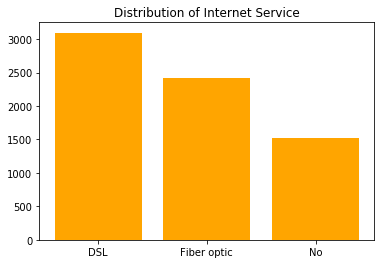

In [10]:
y=customer_churn['InternetService'].value_counts()
x=customer_churn['InternetService'].unique()
plt.bar(x,y,color="Orange")
plt.title('Distribution of Internet Service')
plt.show()
#customer_churn['InternetService'].values
#x.count()

b.	Build a histogram for the ‘tenure’ column:
i.	Set the number of bins to be 30
ii.	Set the color of the bins  to be ‘green’
iii.	Assign the title ‘Distribution of tenure’


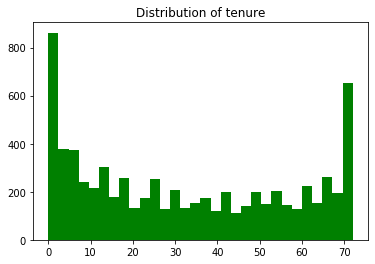

In [12]:
x=customer_churn['tenure']
plt.hist(x,bins=30,color='green')
#plt.title('Distribution of tenure',y=-0.2) # sets the title at bottom
plt.title('Distribution of tenure')
plt.show()

c.	Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:
i.	Assign the points a color of ‘brown’
ii.	Set the x-axis label to ‘Tenure of customer’
iii.	Set the y-axis label to ‘Monthly Charges of customer’
iv.	Set the title to ‘Tenure vs Monthly Charges’


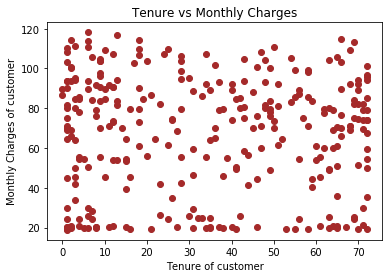

In [13]:
x=customer_churn['tenure']
x=x.sample(n=300)
y=customer_churn['MonthlyCharges']
y=y.sample(n=300)
plt.scatter(x,y,color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

d.	Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis. 

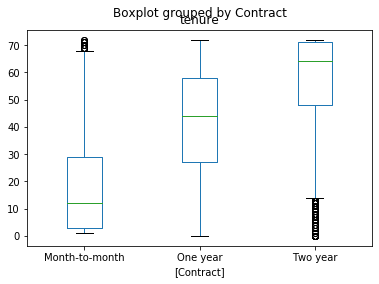

In [5]:
x=customer_churn['Contract']
#x=x.sample(n=300)
y=customer_churn['tenure']
#y=y.sample(n=300)
#plt.boxplot(y)
#plt.show()
customer_churn.boxplot(column=['tenure'],by=['Contract'],grid=False)

# C)	Linear Regression:

a.	Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
i.	Divide the dataset into train and test sets in 70:30 ratio. 
ii.	Build the model on train set and predict the values on test set
iii.	After predicting the values, find the root mean square error
iv.	Find out the error in prediction & store the result in ‘error’
v.	Find the root mean square error

In [9]:
x=pd.DataFrame(customer_churn['tenure'])
y=pd.DataFrame(customer_churn['MonthlyCharges'])

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)
regressor= LinearRegression()
print(x_train.shape)
regressor.fit(x_train,y_train)

(4930, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred=regressor.predict(x_test)

print(pd.DataFrame(y_pred).head(5))
print(pd.DataFrame(y_test).head(5))
#print(pd.DataFrame(y_pred).head())
#x_test

           0
0  60.950896
1  72.980967
2  59.190398
3  55.669402
4  71.513885
      MonthlyCharges
2200           58.20
4627          116.60
3225           71.95
2828           20.45
3768           77.75


In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score(y_test,y_pred,sample_weight=None)

0.069470028128085

In [18]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
rmse

29.394584027273893

In [51]:
print(pd.DataFrame(y_pred).head(5))
print(pd.DataFrame(y_test).head(5))

           0
0  67.515328
1  75.267438
2  58.522880
3  56.352289
4  57.902711
      MonthlyCharges
3381           79.85
6180          102.40
4829           45.00
3737           50.60
4249           65.90


# D)	Logistic Regression:

a.	Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’
i.	Divide the dataset in 65:35 ratio
ii.	Build the model on train set and predict the values on test set
iii.	Build the confusion matrix and get the accuracy score


In [30]:
x=pd.DataFrame(customer_churn['MonthlyCharges'])
y=pd.DataFrame(customer_churn['Churn'])
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35,random_state=1)
logReg= LogisticRegression()
logReg.fit(x_train,y_train)

C:\Users\PRADEEP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PRADEEP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = logReg.predict(x_test)
#logReg.score(x_test,y_pred)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
confu_matrix = confusion_matrix(y_pred, y_test)
accuracy= accuracy_score(y_pred,y_test)
print(confu_matrix,accuracy)

[[1840  626]
 [   0    0]] 0.7461476074614761


#--------------Multiple logistic regression-------------------

b.	Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’
i.	Divide the dataset in 80:20 ratio
ii.	Build the model on train set and predict the values on test set
iii.	Build the confusion matrix and get the accuracy score


In [57]:
y= customer_churn['Churn']
x=pd.DataFrame(customer_churn.loc[:,['MonthlyCharges','tenure']])
#x= pd.DataFrame(data=customer_churn,columns=['tenure','MonthlyCharges'])

In [61]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8)
multiLogModel= LogisticRegression()
multiLogModel.fit(x_train,y_train)

C:\Users\PRADEEP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred=multiLogModel.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
confu_matrix = confusion_matrix(y_pred, y_test)
accuracy= accuracy_score(y_pred,y_test)
print(confu_matrix,accuracy)

[[948 188]
 [100 173]] 0.7955997161107168


# E)	Decision Tree:

a.	Build a decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’
i.	Divide the dataset in 80:20 ratio
ii.	Build the model on train set and predict the values on test set
iii.	Build the confusion matrix and calculate the accuracy


In [10]:
x= pd.DataFrame(customer_churn['tenure'])
y= customer_churn['Churn']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
decisionTree= DecisionTreeClassifier()
decisionTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
y_pred= decisionTree.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
confu_matrix = confusion_matrix(y_test, y_pred)
accuracy= accuracy_score(y_test,y_pred)
print(confu_matrix,accuracy)

[[965  76]
 [281  87]] 0.7466288147622427


# F)	Random Forest:

a.	Build a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’
i.	Divide the dataset in 70:30 ratio
ii.	Build the model on train set and predict the values on test set
iii.	Build the confusion matrix and calculate the accuracy


In [32]:
#x=pd.DataFrame(customer_churn.loc[:,['tenure','MonthlyCharges']])
x=customer_churn[['tenure','MonthlyCharges']]
y= customer_churn['Churn']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rndm= RandomForestClassifier(n_estimators=100)

rndm.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
y_pred= rndm.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score

conf= confusion_matrix(y_test,y_pred)
acc= accuracy_score(y_test,y_pred)
print(conf,acc)

[[880 161]
 [218 150]] 0.7310149041873669
